In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart.csv')

### Basic Checks

In [3]:
data.head() #first five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.tail() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Exploratory Data Analysis

#### Univariate Analysis

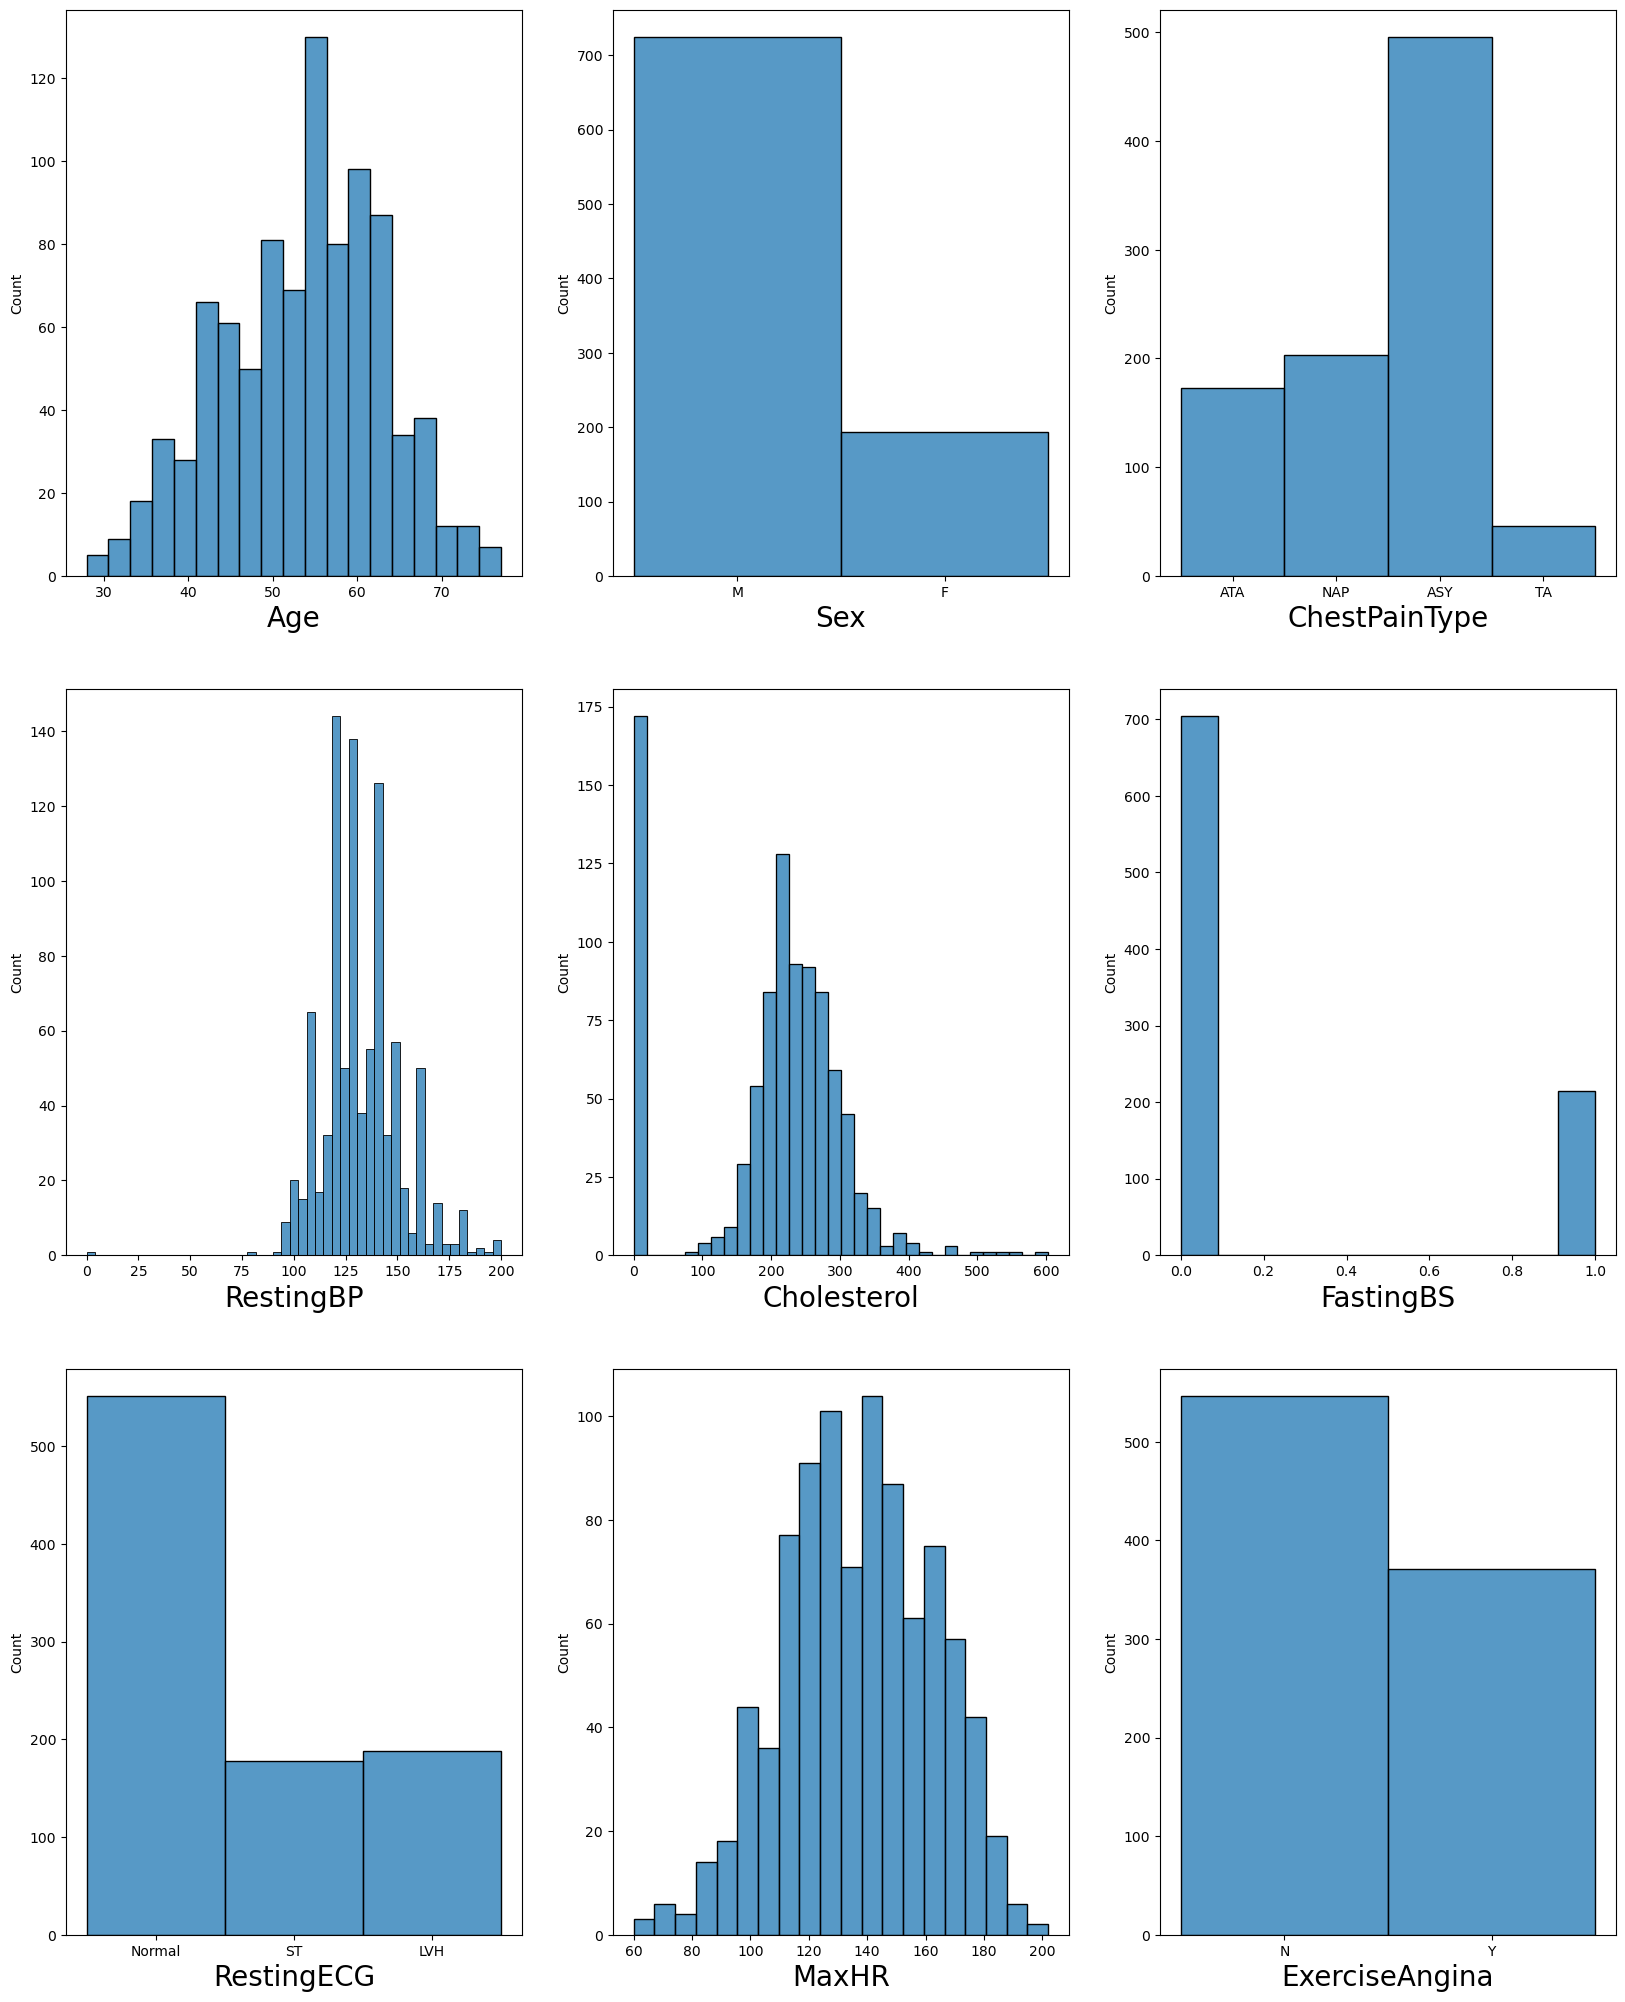

In [7]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

<Axes: xlabel='MaxHR', ylabel='Count'>

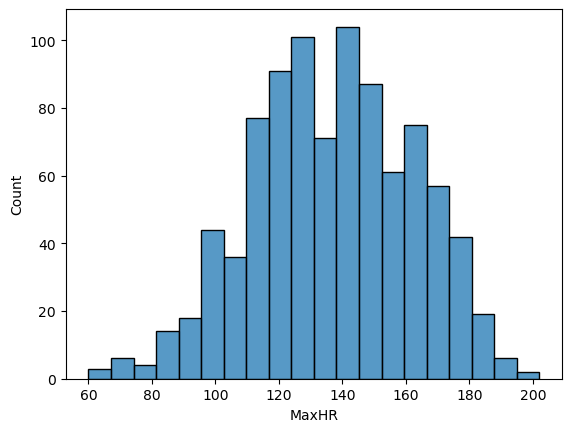

In [8]:
sns.histplot(x=data['MaxHR'])

#### Bivariate Analysis

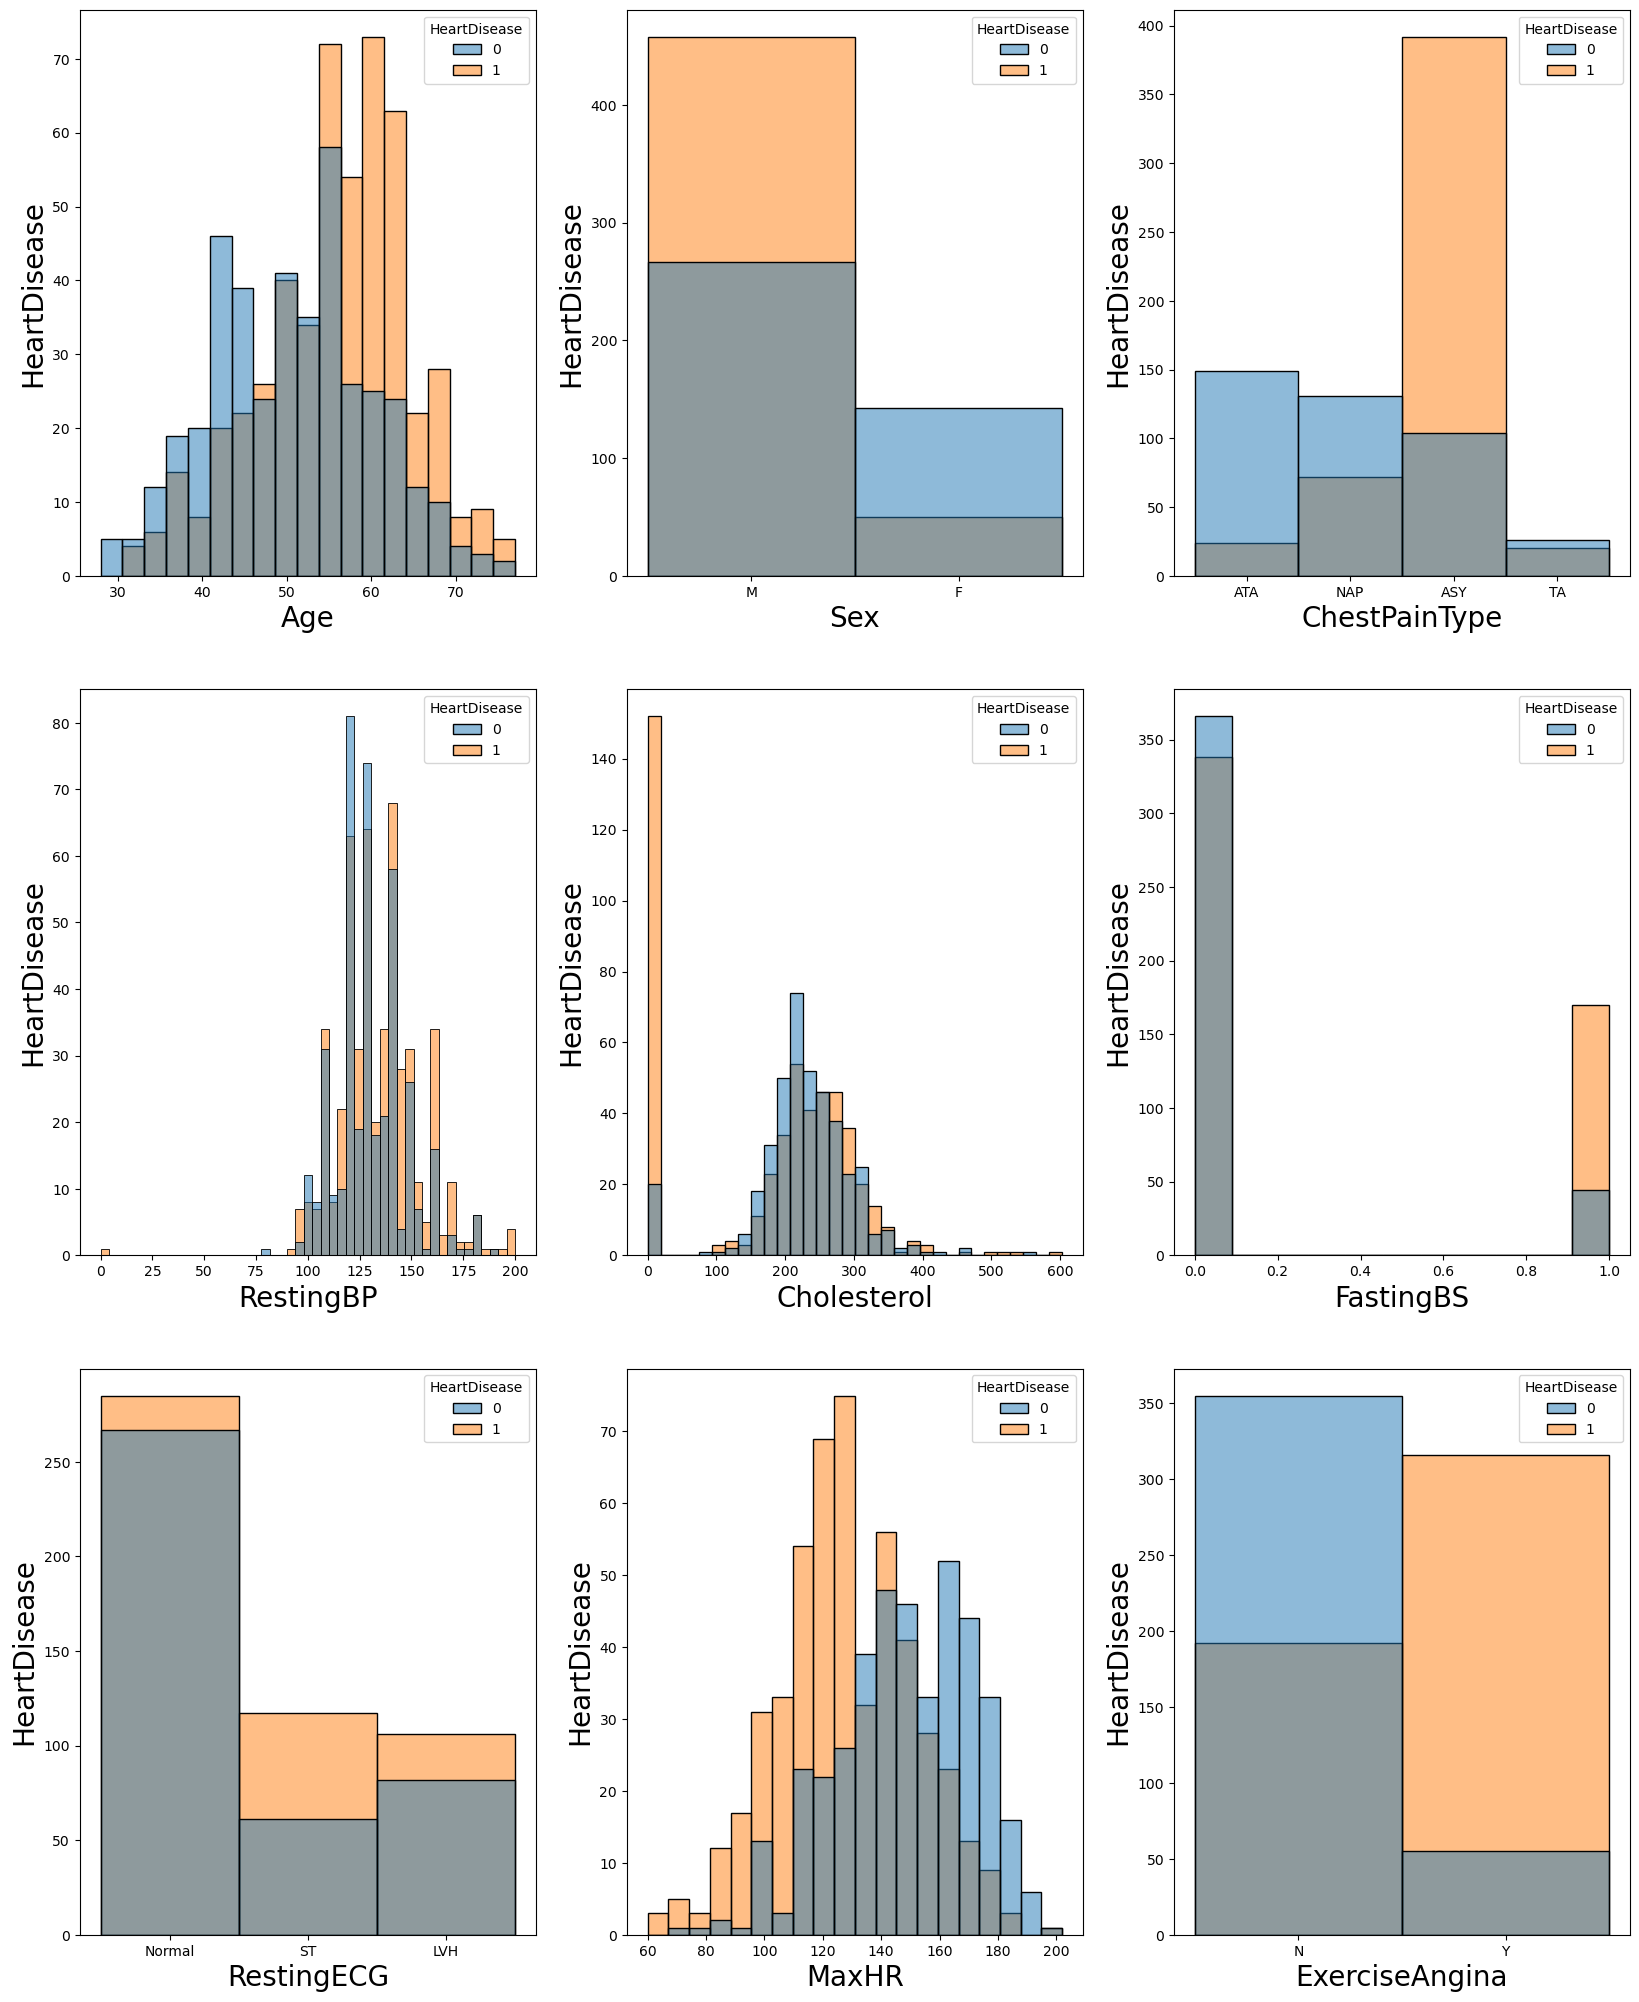

In [9]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],hue=data.HeartDisease)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('HeartDisease',fontsize=20)
    plotnumber+=1
plt.show()

### Data Preprocessing

#### Checking for null values

In [10]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Conversion of categorical columns to numerical columns

### 1.Gender

#### Using LabelEncoder to convert

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder() #in order F-0, M-1
data.Sex=lb.fit_transform(data['Sex'])

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 2.ChestPain Type

#### Frequency encoding

In [14]:
data.rename({'ChestPainType':'cpt'},axis=1,inplace=True)

In [15]:
data.cpt.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
data.cpt.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: cpt, dtype: int64

In [17]:
data.loc[data['cpt']=='ASY','cpt']=3
data.loc[data['cpt']=='NAP','cpt']=2
data.loc[data['cpt']=='ATA','cpt']=1
data.loc[data['cpt']=='TA','cpt']=0

In [18]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,1,130,283,0,ST,98,N,0.0,Up,0
3,48,0,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,Normal,122,N,0.0,Up,0


### 3.RestingECG 

In [19]:
# preprocessing data

In [20]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [21]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [22]:
data.loc[data['RestingECG']=='Normal','RestingECG']=0
data.loc[data['RestingECG']=='LVH', 'RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=2

In [23]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,N,0.0,Up,0
1,49,0,2,160,180,0,0,156,N,1.0,Flat,1
2,37,1,1,130,283,0,2,98,N,0.0,Up,0
3,48,0,3,138,214,0,0,108,Y,1.5,Flat,1
4,54,1,2,150,195,0,0,122,N,0.0,Up,0


### 4. ExerciseAngina

In [24]:
data.ExerciseAngina.value_counts() #N-0, Y-1

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [25]:
data.ExerciseAngina=lb.fit_transform(data['ExerciseAngina'])

In [26]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,Up,0
1,49,0,2,160,180,0,0,156,0,1.0,Flat,1
2,37,1,1,130,283,0,2,98,0,0.0,Up,0
3,48,0,3,138,214,0,0,108,1,1.5,Flat,1
4,54,1,2,150,195,0,0,122,0,0.0,Up,0


### 5. ST_Slope

In [27]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [28]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [29]:
data.loc[data['ST_Slope']=='Flat','ST_Slope']=2
data.loc[data['ST_Slope']=='Up','ST_Slope']=1
data.loc[data['ST_Slope']=='Down','ST_Slope']=0

In [30]:
data.head()

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,2,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


#### Checking Correlation

In [31]:
data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


### Feature Selection

<Axes: >

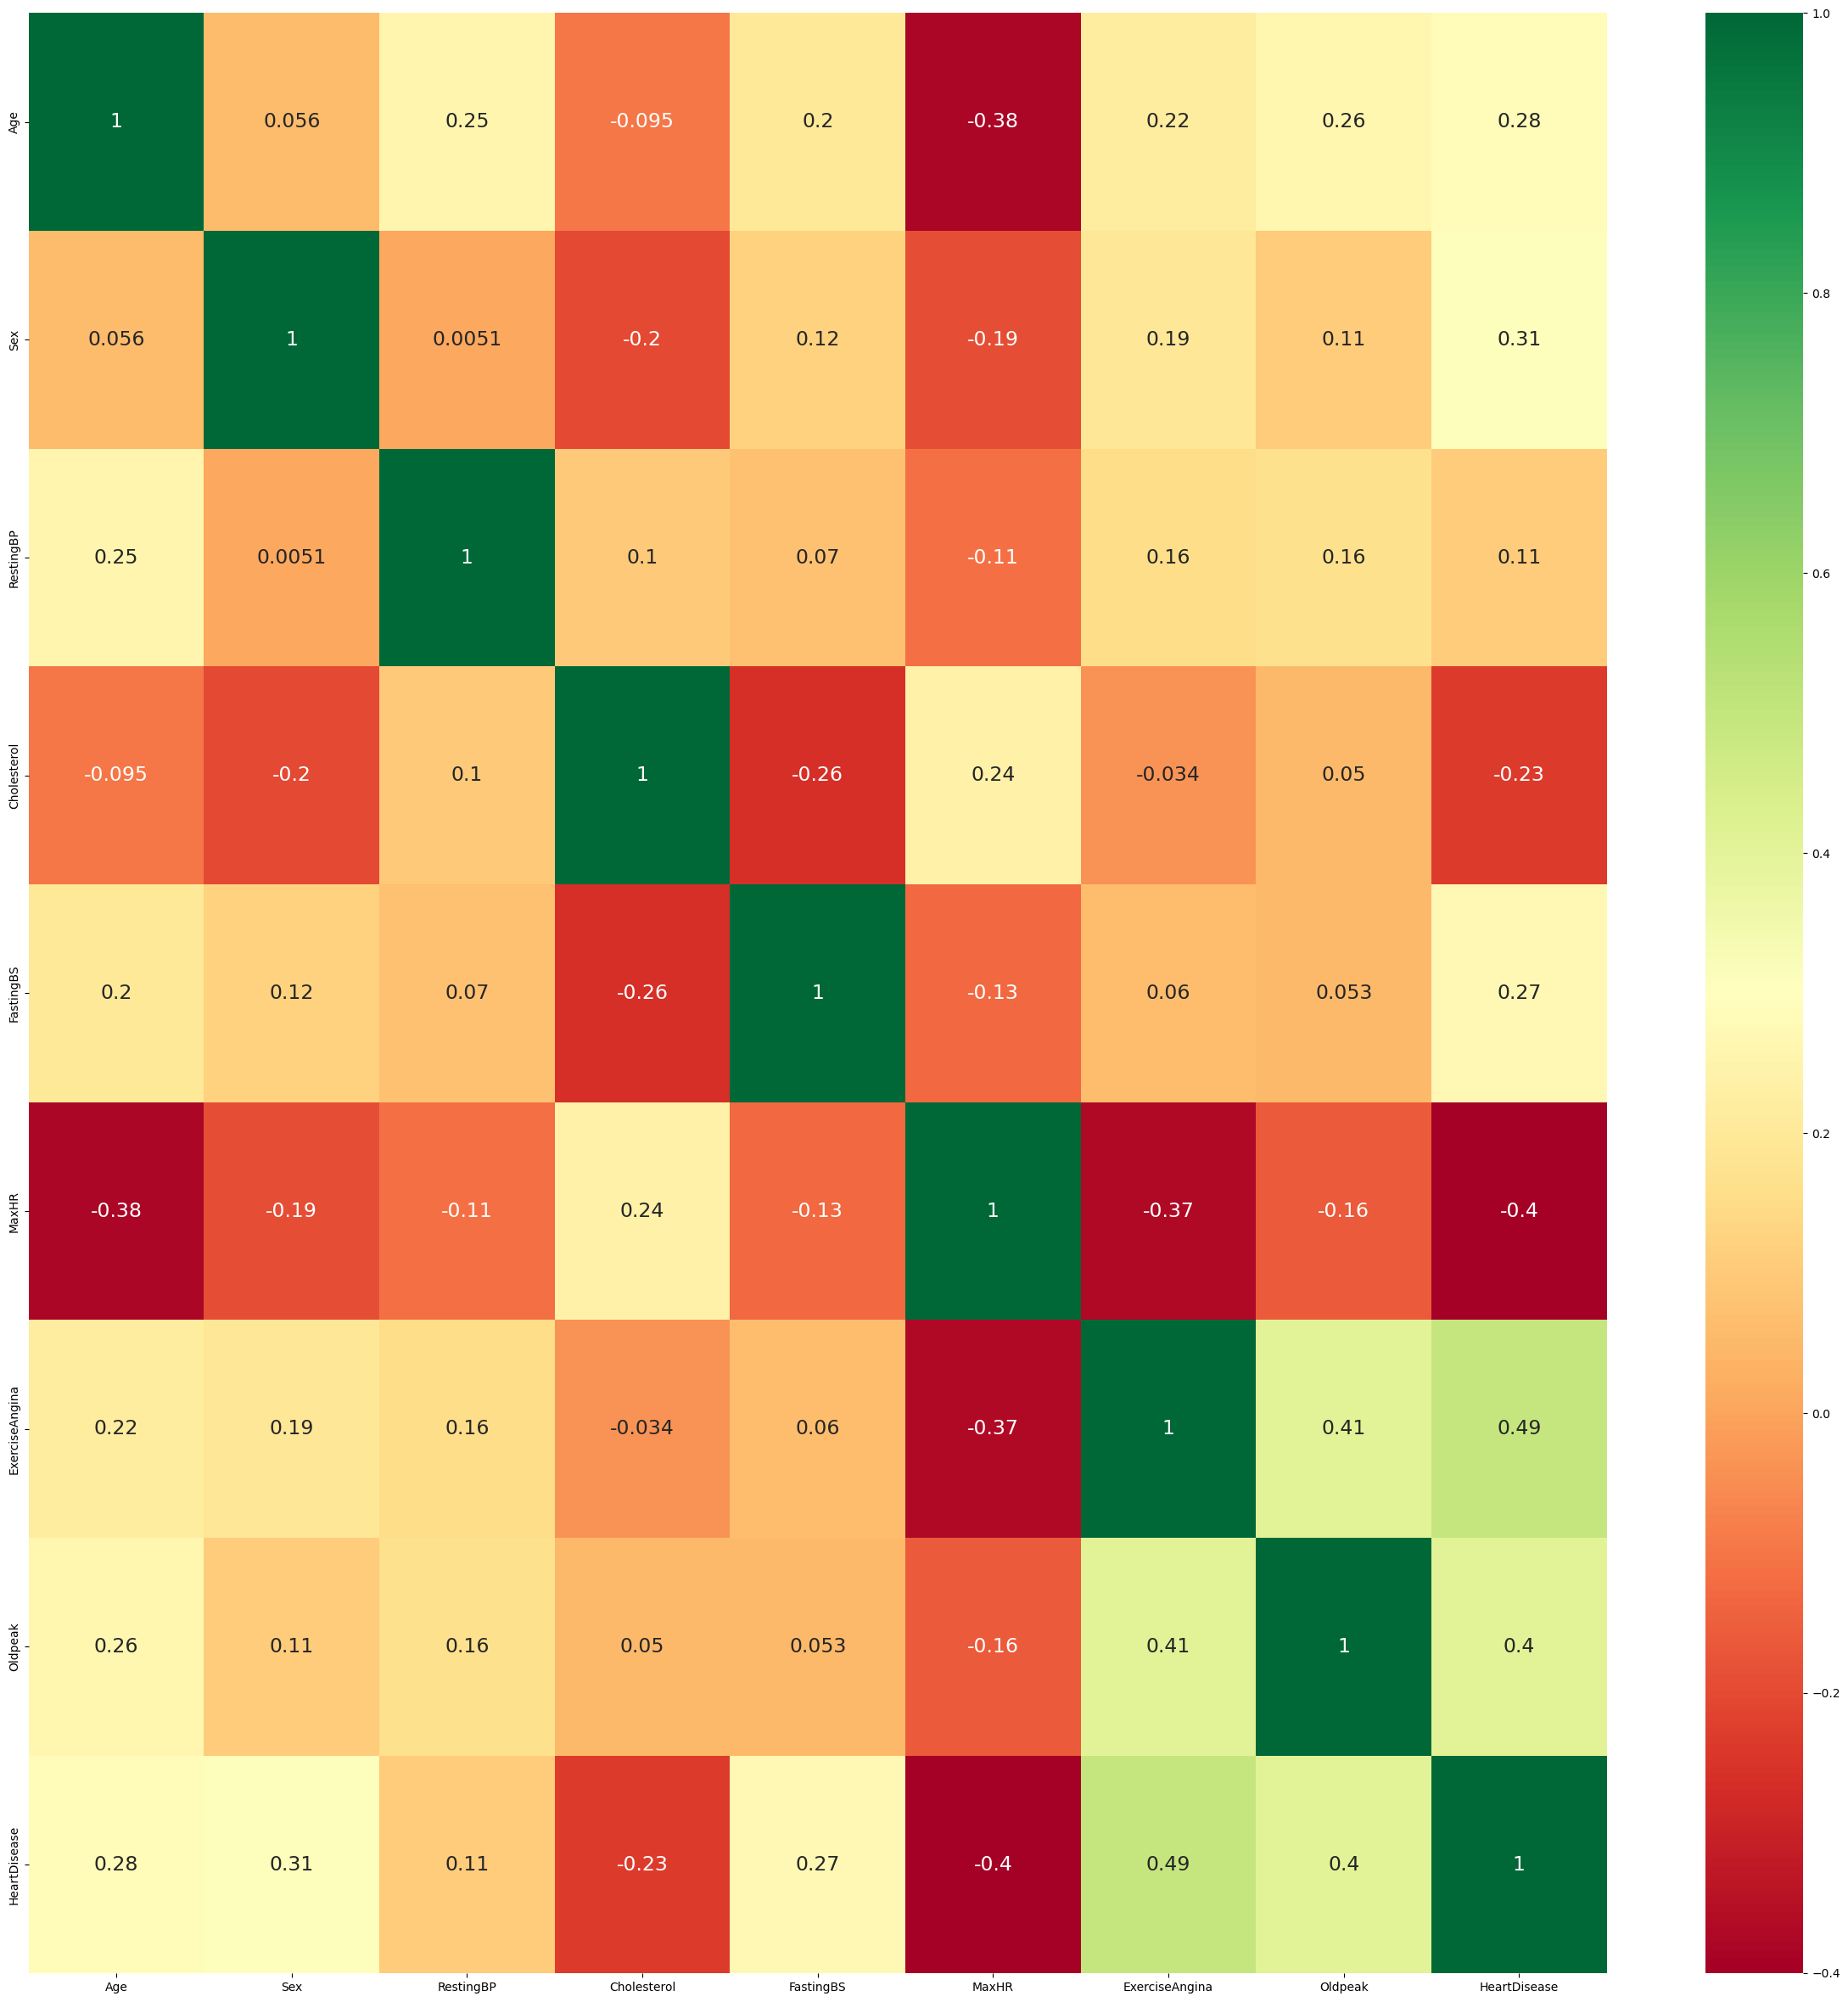

In [32]:
plt.figure(figsize=(30,30)) #canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":17}) #plotting heatmap to check correlation

### Model Creation

In [33]:
# creating X and y
X=data.drop('HeartDisease',axis=1)
y=data.HeartDisease #independent variable/target

In [34]:
X

,Age,Sex,cpt,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,0,172,0,0.0,1
1,49,0,2,160,180,0,0,156,0,1.0,2
2,37,1,1,130,283,0,2,98,0,0.0,1
3,48,0,3,138,214,0,0,108,1,1.5,2
4,54,1,2,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,2
914,68,1,3,144,193,1,0,141,0,3.4,2
915,57,1,3,130,131,0,0,115,1,1.2,2
916,57,0,1,130,236,0,1,174,0,0.0,2


In [35]:
#creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=3)

### Gradient Boosting

- Gradient boosting is a type of machine learning boosting. It relies on the intuition
that the best possible next model, when combined with the previous models minimizes the
overall prediction error. The key ideas is to set the target outcomes for this next model
in order to minimize the error.

In [36]:
#importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() #object creation
gbm.fit(X_train,y_train) #fitting the data
y_gbm=gbm.predict(X_test) #predicting the disease


In [37]:
#Model evaluation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
ac_score=accuracy_score(y_test,y_gbm)
ac_score

0.8826086956521739

In [38]:
## Installing XGB library
!pip3 install xgboost

In [39]:
import xgboost

In [40]:
y_train

39     0
409    1
762    1
31     0
768    0
      ..
256    0
643    1
249    1
664    1
874    0
Name: HeartDisease, Length: 688, dtype: int64

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 39 to 874
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             688 non-null    int64  
 1   Sex             688 non-null    int64  
 2   cpt             688 non-null    object 
 3   RestingBP       688 non-null    int64  
 4   Cholesterol     688 non-null    int64  
 5   FastingBS       688 non-null    int64  
 6   RestingECG      688 non-null    object 
 7   MaxHR           688 non-null    int64  
 8   ExerciseAngina  688 non-null    int64  
 9   Oldpeak         688 non-null    float64
 10  ST_Slope        688 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 64.5+ KB


In [42]:
X_train.ST_Slope=X_train.ST_Slope.astype('int64')
X_train.RestingECG=X_train.RestingECG.astype('int64')
X_train.cpt=X_train.cpt.astype('int64')

In [43]:
X_test.ST_Slope=X_test.ST_Slope.astype('int64')
X_test.RestingECG=X_test.RestingECG.astype('int64')
X_test.cpt=X_test.cpt.astype('int64')

In [44]:
## model creation

from xgboost import XGBClassifier 
xgb_r=XGBClassifier() 
xgb_r.fit(X_train,y_train)
y_hat=xgb_r.predict(X_test)

In [45]:
#Model evaluation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
ac_score=accuracy_score(y_test,y_hat)
ac_score

0.8913043478260869

In [46]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       104
           1       0.92      0.88      0.90       126

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [47]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma' : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'learning_rate': [0.01,0.03,0.06, 0.1, 0.15, 0.2, 0.25, 0.30, 0.4, 0.5, 0.6, 0.7],
             'max_depth': [5,6,7,8,9,10,11,12,13,14],
             'n_estimators': [50,65,80,100,115,130,150],
             'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
             'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB = XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                       verbose=2, random_state=42, n_jobs=-1)

#estimator -- number of decision tree
#scoring --- performance matrix to check performance
#param_distribution -- hyperparameters (dictionary we created)
#n_iter --- number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
#cv --- number of flods
#verbose --- controls the verbosity : the higher, the more messages.
#n_jobs --- number of jobs to run in parallel, -1 means using all processors.

rcv.fit(X_train, y_train) ##training data on randomsearch cv
cv_best_params = rcv.best_params ##it will give you best parameters
print(f"Best parameters: {cv_best_params}") ##printing best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params'

In [48]:
XGB2 = XGBClassifier(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma = 0.8)
XGB2.fit(X_train,y_train) #training
y_predict = XGB2.predict(X_test) #testing
f1_score = f1_score(y_predict, y_test) #checking performance

In [49]:
f1_score #calling variable

0.899598393574297

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       104
           1       0.91      0.89      0.90       126

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



### XGBoost 

#### Pros

1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well).
2. Feature importance can be found out (output importance of each feature, can be used for feature selection).
3. Fast to interpret
4. Outliers have minimal impact. 
5. Handles large sized datasets well. 
6. Good execution speed. 
7. Good model performance (wins most of the Kaggle competitions). 
8. Less prone to overfitting.

#### Cons
1. Difficult interpretation, visualisation tough.
2. Overfitting possible if parameters not tuned proper. 